In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd

In [27]:
train_df = pd.read_csv("./train.csv")

X_train = train_df[["x1", "x2"]]
y_train = train_df["t"]

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
test_df = pd.read_csv("./test.csv")

X_test = test_df[["x1", "x2"]]
y_test = test_df["t"]

y_prediction = model.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [29]:
conf_matrix = confusion_matrix(y_test, y_prediction)

print("Macierz pomyłek:")
print(conf_matrix)

Macierz pomyłek:
[[96  2]
 [ 5 97]]


/home/melville/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/melville/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/melville/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/melville/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

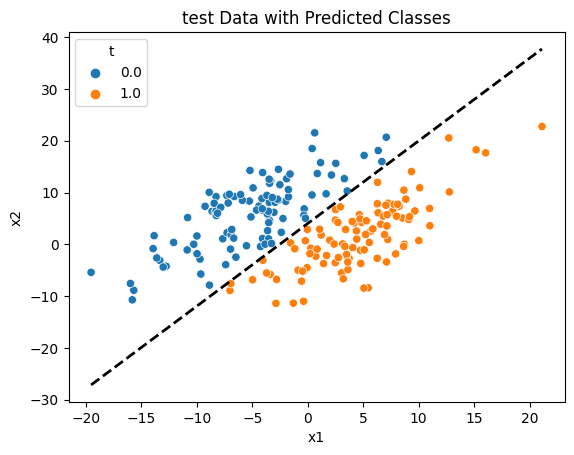

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

test_df['t'] = y_prediction

sns.scatterplot(x="x1", y="x2", hue="t", data=test_df)
plt.title("test Data with Predicted Classes")

coef = model.coef_[0]
intercept = model.intercept_

slope = -coef[0] / coef[1]
intercept = -intercept / coef[1]

x_decision_boundary = np.linspace(test_df['x1'].min(), test_df['x1'].max(), 100)

y_decision_boundary = slope * x_decision_boundary + intercept

plt.plot(x_decision_boundary, y_decision_boundary, color='black', linestyle='--', linewidth=2)

plt.show()

In [31]:
import tensorflow as tf
from tensorflow import keras

2023-09-25 23:01:02.930758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, verbose=0) 

/home/melville/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/melville/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/melville/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/melville/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 62ms/step


KeyboardInterrupt: 

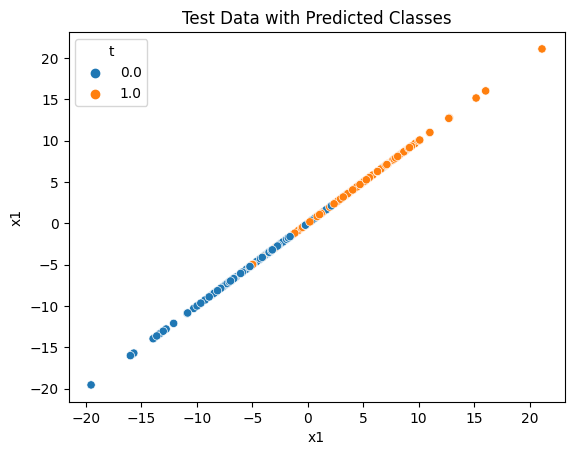

In [37]:
# Create a scatter plot of the test data with predicted classes
sns.scatterplot(x='x1', y='x1', hue='t', data=test_df)
plt.title('Test Data with Predicted Classes')

# Define a function to predict class labels based on the neural network model
def predict_class(x, y):
    features = np.array([[x, y]])
    prediction = model.predict(features)
    return int(prediction > 0.5)

# Create a grid of points and predict their classes to plot the decision boundary
x_min, x_max = test_df['x1'].min(), test_df['x1'].max()
y_min, y_max = test_df['x2'].min(), test_df['x2'].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.array([predict_class(x, y) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Show the plot
plt.show()
